# Analysis of Ad-Hoc Communications Network
Author: Yimeng Wang  
Course: ECE143 2018Spring  
Date: May 21, 2018  

This project is to explore the coverage of random communication towers' rectangular footprint in a given rectangular region, and to solve the three computational problems: 
  * Given a random sequence of n communication towers, what's the resulting coverage? 
  * What is the resulting coverage relative to the desired total coverage area?
  * How many communications towers are required before full coverage is obtained on averaged?

I imported two Python fundamental packages which are:
  * Numpy, a scientific package which contains powerful N-dimensional array object and sophisticated functions.
  * Pyplot from matplotlib, a MATLAB-like plotting framework which satisfes the visualization requirement for this project.
 
There are several key points when solving the problems so I wrote six helper functions:
  * The x-axis position, y-axis position, width and length of the tower footprints are all integer based and are determined by the random uniform distribution. Thus, the function *uniform_gen* randomly determines the position and size of the newly generated rectangle.
  * Any new towers intersecting with the existing coverage must be trimmed such that maximum remaining coverage area is retained. So the function *intersection* first check if new tower has overlapping footprint and then *trim* function does the work. The algorithm for trimming is to use *window_gen* function to give a list of [height, width] which can be mapped onto the newly generated fooprint. The list is sorted such that the value of area(height*width) is decreasing. When the window first find the rectangle with no intersection, it is the largest rectangle to be retained.
  
However there are also some limitations in this project:
  * We assunme the sizes of total desired coverage and the tower footprint are all integer-based. But it is not very likely to happen in reality.
  * The algorithm of trim takes a lot of runtime memories. A more efficient algorithm may be used.

In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
def uniform_gen(width, height):
    '''
    this function returns the width and height of the rectangular footprint 
    and the position of the footprint from a uniform distribution.
    
    :param: width>0, height>0
    :type: integer
    '''
    assert isinstance(width, int)
    assert width > 0
    assert isinstance(height, int)
    assert height > 0
    
    position = [] # lower-left corner of the rectangle
    pos_y = int(np.random.uniform(0, height)) # y-axis position contained within the original footprint
    position.append(pos_y)
    pos_x = int(np.random.uniform(0, width)) # x-axis position contained within the original footprint
    position.append(pos_x)
    
    rectangle = []
    rec_h = int(np.random.uniform(1, height-pos_y)) # length of height restricted by x-axis position, can't be 0
    rectangle.append(rec_h)
    rec_w = int(np.random.uniform(1, width-pos_x)) # length of width restricted by x-axis position, can't be 0
    rectangle.append(rec_w)

    return position, rectangle


In [169]:
def intersection(pos, rec, A):
    '''
    this function checks whether the newly generated tower has a footprint 
    intersected with the existing coverage.
    
    :param: position, rectangle, A
    :type: list, list, ndarray
    '''    
    
    assert isinstance(pos, list)
    assert isinstance(rec, list)
    assert isinstance(A, np.ndarray)
    
    if np.all(A[pos[0]:pos[0]+rec[0],pos[1]:pos[1]+rec[1]] == 0):
        return False
    else:
        return True
    

In [170]:
def window_gen(rec):
    '''
    this function generates lists of rectangular windows 
    which can be mapped on the newly generated rectangular
    footprint to help 'trim' function to do its task.
    
    :param: rec
    :type: list
    ''' 
    
    assert isinstance(rec, list)
    b=rec[0]
    a=rec[1]
    window=[]
    
    for i in range(a):
        for j in range(b):
            if i==a-1 and j==b-1:
                break
            window.append([j+1,i+1])
    
    # sort from smallest area to largest area
    index=sorted(range(len(window)),key=lambda k:window[k][0]*window[k][1])
    
    # reverse so windows are from largest area to smallest area
    output_window=[]
    for i in range(len(window)):
        output_window.append(window[index[len(window)-i-1]])
    return output_window


In [171]:
def trim(pos, rec, A):
    '''
    this function trims the composite footprint such that the maximum remaining
    coverage area is retained.
    
    :param: position, rectangle, A
    :type: list, list, np.ndarray
    '''    
    assert isinstance(pos, list)
    assert isinstance(rec, list)
    assert isinstance(A, np.ndarray)
    
    window = window_gen(rec)
    for i in range(len(window)):
        for j in range(rec[0]-window[i][0]+1):
            for k in range(rec[1]-window[i][1]+1):
                if intersection([pos[0]+j,pos[1]+k],window[i],A):
                    return [pos[0]+j,pos[1]+k], window[i] # return new position and size
    return False # nothing to trim


In [172]:
def full(A):
    '''
    this function checks whether the total desired rectangle is fully covered.
    
    :param: A
    :type: np.ndarray
    '''    
    assert isinstance(A, np.ndarray)   
    
    if np.all(A != 0):
        return True
    else:
        return False
    

In [173]:
def coverage(A):
    '''
    this calculates the current coverage.
    
    :param: A
    :type: np.ndarray
    ''' 
    assert isinstance(A, np.ndarray) 
    indexes = np.where(A!=0) # each index represents covered area of 1
    return len(indexes[0])
    

In [174]:
h = raw_input("Please enter the height for your desired rectangular coverage: ")
w = raw_input("Please enter the width for your desired rectangular coverage: ")
h=int(h)
w=int(w)

Please enter the height for your desired rectangular coverage: 5
Please enter the width for your desired rectangular coverage: 5


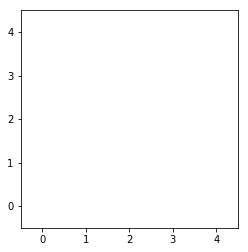

In [175]:
# original footprint
A=np.zeros((h,w))
my_cmap = plt.get_cmap('rainbow')
my_cmap.set_under('white')
plt.imshow(A, cmap="Greys", origin='lower')
plt.show()


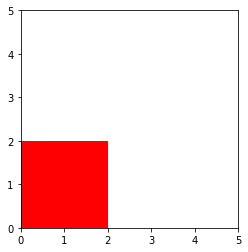

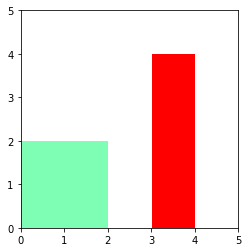

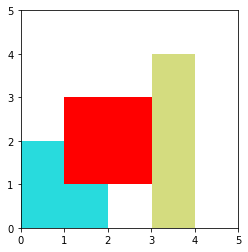

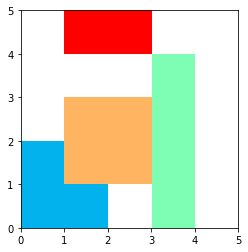

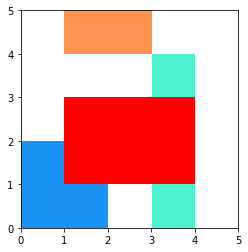

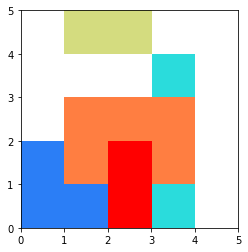

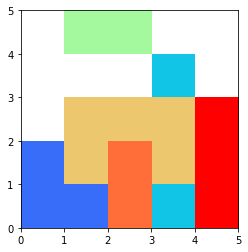

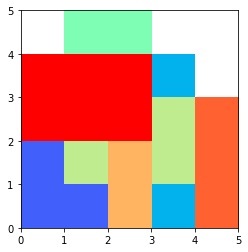

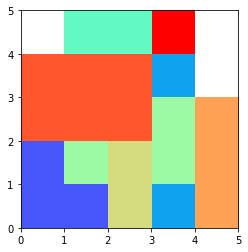

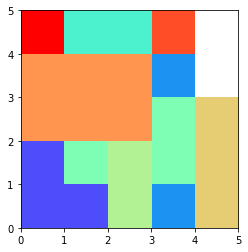

The resulting resolved coverage is:  23
The percentage of exisiting coverage to total coverage is:  92.00%


In [176]:
# solve problem 1 and 2

n = 10
i = 1
while i<=n:
    pos, rec = uniform_gen(w,h)
    if intersection(pos,rec,A)== True:
        if full(A[pos[0]:pos[0]+rec[0],pos[1]:pos[1]+rec[1]]) == True:
            continue;
        else:
            new_pos, new_rec = trim(pos, rec, A)
            A[new_pos[0]:new_pos[0]+new_rec[0],new_pos[1]:new_pos[1]+new_rec[1]] = i
            
    else:
        A[pos[0]:pos[0]+rec[0],pos[1]:pos[1]+rec[1]] = i
    i+=1
    plt.imshow(A,cmap=my_cmap,origin='lower',vmin=0.01,extent=[0,w,0,h])
    plt.show()

print "The resulting resolved coverage is: ",coverage(A)
proportion = float(coverage(A))/float(w*h)
print "The percentage of exisiting coverage to total coverage is: ", "{0:.2%}".format(proportion)

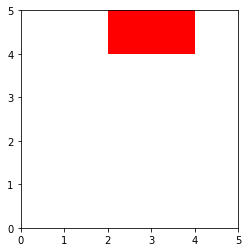

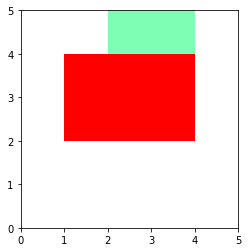

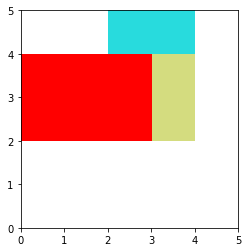

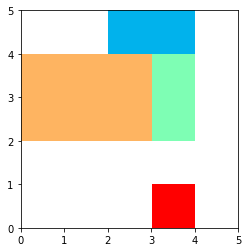

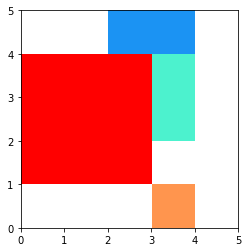

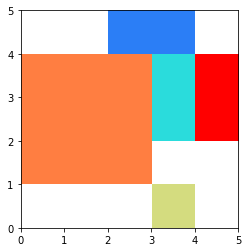

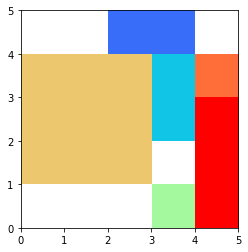

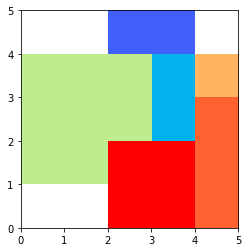

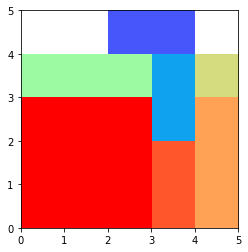

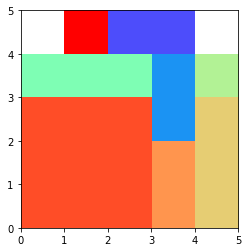

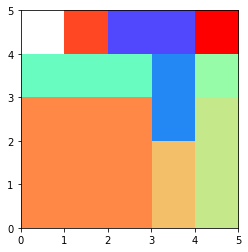

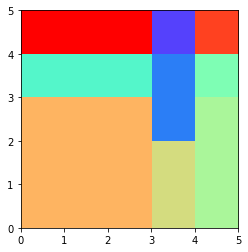

The number of communication towers required for full coverage is:  12


In [178]:
# solve problem 3

A=np.zeros((h,w))
i=1
while (full(A) == False):
    pos, rec = uniform_gen(w,h)
    if intersection(pos,rec,A)== True:
        if full(A[pos[0]:pos[0]+rec[0],pos[1]:pos[1]+rec[1]]) == True:
            continue;
        else:
            new_pos, new_rec = trim(pos, rec, A)
            A[new_pos[0]:new_pos[0]+new_rec[0],new_pos[1]:new_pos[1]+new_rec[1]] = i
            
    else:
        A[pos[0]:pos[0]+rec[0],pos[1]:pos[1]+rec[1]] = i
    i+=1
    plt.imshow(A,cmap=my_cmap,origin='lower',vmin=0.01,extent=[0,w,0,h])
    plt.show()

print "The number of communication towers required for full coverage is: ", i-1  